<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/sample_data/WineQT.csv', index_col='Id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df['quality'].nunique()

6

In [24]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<Axes: >

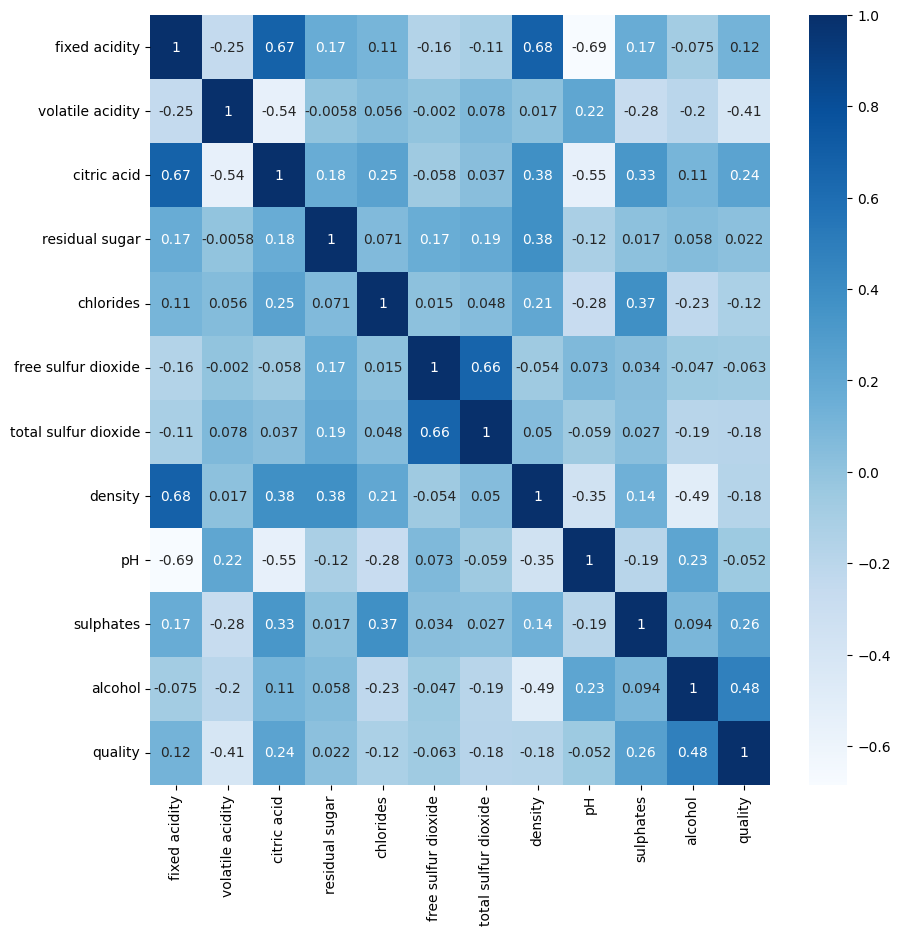

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [25]:
train = df.drop('quality', axis=1)
test = df['quality']

In [26]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

In [28]:
RandomForestClassifier?

In [30]:
rf_classifier = RandomForestClassifier()

# n_estimators : int, default=100
#     The number of trees in the forest.

#     .. versionchanged:: 0.22
#        The default value of ``n_estimators`` changed from 10 to 100
#        in 0.22.

# criterion : {"gini", "entropy", "log_loss"}, default="gini"

params = {'n_estimators': range(50, 150 + 1, 10),
          'criterion': ["gini", "entropy", "log_loss"]}

grid = GridSearchCV(rf_classifier, params, cv=5)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(50, 151, 10)})

In [32]:
grid.best_score_

0.6587500000000001

In [18]:
grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9039301310043668

<img src="https://freesvg.org/img/No-tomar-alcohol.png" width=30% height=30%><br>
<H1>I am against drinking alcohol<br>(even if your wine is high-quality one)<H1>